<a href="https://colab.research.google.com/github/coyens/Python/blob/master/warsztaty/image_processing%20in%20keras/image_processing_clothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import keras
import os
from keras import backend as K
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import tensorflow as tf
from keras.utils import to_categorical

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

TensorFlow 1.x selected.


Using TensorFlow backend.


# Gather the data

In [0]:
# load CIFAR 10 images
# description of this dataset can be seen here:
# https://www.cs.toronto.edu/~kriz/cifar.html

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
# both X and y are numpy arrays
# the most essential infomation about numpy arrays is in their shape
X_train.shape

(60000, 28, 28)

Label number for that class: 0


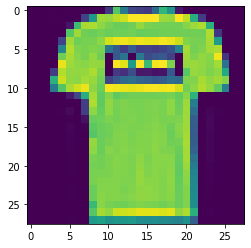

In [10]:
# assign seventh example from training batch to variable called "example_img"
example_img = deepcopy(X_train[1])
print('Label number for that class:', y_train[1])
# display img
plt.imshow(example_img)

In [26]:
# print the shape of example_img
example_img.shape

(28, 28)

In [27]:
# extract first channel from example_img and assign it to 'red_channel' variable
# red_channel var shape should be (32, 32)
##TODO
red_channel = example_img[255,0,0]##TODO
assert red_channel.shape == (28, 28)
plt.imshow(np.concatenate([red_channel[..., None], 
                           np.zeros(shape=(28, 28, 2), dtype='int')], axis=-1))

IndexError: ignored

# Image classifier (dense neural network)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [0]:
# build a dense neural architecture that receives input vector of length 3072
# and outputs prediction for 10 classes (softmax activation)
# use Adam optimizer, categorical_crossentropy loss
# our metrics will be accuracy

dense_network = Sequential()
##TODO build your dense network !
dense_network.add(Dense(10, input_dim= (2352), activation = 'softmax'))


dense_network.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
dense_network.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                23530     
Total params: 23,530
Trainable params: 23,530
Non-trainable params: 0
_________________________________________________________________


In [41]:

##TODO
# flatten the X_train examples ((50000, 32, 32, 3) -> (50000, 3072))
# hint: you can use numpy reshape function
X_train_flat = X_train.reshape(60000, 2352)

X_train_flat = X_train_flat/255

assert X_train_flat.shape == (60000, 2352)

y = to_categorical(y_train)

##TODO
# convert the X_train_flat array value range from (0; 255) to (0; 1)
#X_train_flat = 
assert np.max(X_train_flat) <= 1.

##TODO
# convert y_train to one hot encoding
# hint: you can use keras.utils.to_categorical function
#y = 
assert y.shape == (60000, 10)

ValueError: ignored

In [42]:
##TODO
# train your network
# use batch size 32, split the dataset into train/validation (0.7/0.3)
# keep training for 10 epochs
dense_network.fit()

ValueError: ignored

In [0]:
def show_random_prediction(x, y, model):
  pool = len(x)
  random_int = np.random.randint(low=0, high=pool)
  if len(model.input.shape) == 2:
    sample = x[random_int].reshape(1, -1)
  else:
    sample = x[random_int][None, ...]
  prediction = model.predict(sample)
  plt.figure(figsize=(2, 2))
  plt.imshow(x[random_int])
  print('Predicted label:', np.argmax(prediction))
  print('Actual label:', y[random_int][0])

In [45]:
# rerun this cell to show random predictions
show_random_prediction(X_train, y_train, dense_network)

ValueError: ignored

# Convolutions

In [0]:
# write a fuction that converts RGB images (32, 32, 3) to grayscale (32, 32, 1)
# you can just take an average of all channels (easy way)
# the more elegant method is to extract weighted average (luminosity method)
# the weights are: 0.29 R + 0.58 G + 0.11 B
def rgb2gray(img):
  ##TODO
  return ##TODO

In [0]:
example_img_gray = rgb2gray(example_img)
plt.imshow(example_img_gray, cmap='gray')

In [0]:
# we will create convolutional filter using keras.layers.Conv2D class
from keras.layers import Conv2D

conv_filter = Sequential()
##TODO
# add one convolutional layer that will be a single filter of kernel size = 3
# use 'valid' padding and set the name parameter as 'convolution'
# remember to set input_shape (but now it will be 3-dimensional)
conv_filter.add(Conv2D())

In [0]:
# reshape example_img_gray to include also batch size
example_img_gray = example_img_gray.reshape(1, 32, 32, 1)

In [0]:
# display how conv_filter changes image
result = conv_filter.predict(example_img_gray).reshape(30, 30)
plt.imshow(result, cmap='gray')

In [0]:
# print conv_filter weights
conv_filter.get_layer(name='convolution').get_weights()

In [0]:
# let's define custom kernel! 
# Some of useful kernel patterns are presented here: 
# https://en.wikipedia.org/wiki/Kernel_(image_processing)
# ofc you can define your own values
# for the example, I'll use edge detection kernel
kernel = np.array([
                   [0, 1, 0], 
                   [1, -4, 1],
                   [0, 1, 0]
])

# as you can see above, extracted parameters from Conv2D layer are a list
# The list has two elements:

# first one is actual convolutional kernel of shape (k, k, n, m)
# where k is a kernel size
# n is number of channels in previous layer
# m is number of channels in actual layer

# the second element of Conv2D parameters list is just a bias parameter
# we will set it to 0. for the experiment
kernel = [kernel.reshape(3, 3, 1, 1), np.array([0.])]

In [0]:
conv_filter.get_layer(name='convolution').set_weights(kernel)

In [0]:
conv_filter.get_layer(name='convolution').get_weights()

In [0]:
# display image processed by your custom filter
result = conv_filter.predict(example_img_gray).reshape(30, 30)
plt.imshow(result, cmap='gray')

# LeNet
![alt text](https://miro.medium.com/max/1700/1*AwJZkWLKabIicUPzSN6KCg.png)

In [0]:
from keras.layers.pooling import MaxPool2D
from keras.layers import Flatten
# build your LeNet model !

LeNet = Sequential()
##TODO

In [0]:
# print summary of your ConvNet
LeNet.summary()

In [0]:
# compile your model, using:
# 1. Categorical crossentropy loss
# 2. Accuracy metric
# 3. Any optimizer you want (in most cases Adam provides good performance)
LeNet.compile()

In [0]:
# now use X_train as feature data (since it is not flattened)
# do not flatten, keep 4 dimensions (#examples, width, height, #channels)
# the only thing to do is to reduce the value range from (0; 255) to (0; 1)
# last time we did the normalization for 'X_train_flat', not 'X_train'
X_train = 

In [0]:
# if you still have 'y' variable saved as one hot encoded labels, keep going
# otherwise just run this cell
y = keras.utils.to_categorical(y_train)

In [0]:
# now train your LeNet with the X_train and y
# leave the rest of parameters the same (as for Dense), so you can compare
# which network learns better
LeNet.fit()

In [0]:
# rerun this cell to show random predictions
show_random_prediction(X_train, y_train, LeNet)

# Inception
![alt text](https://miro.medium.com/max/1920/1*gqKM5V-uo2sMFFPDS84yJw.png)

In [0]:
from keras.applications.inception_v3 import InceptionV3
from matplotlib.image import imread
from cv2 import resize, flip

# Data preparation

For higher-resolution images example I've prepared dataset from Kaggle: https://www.kaggle.com/slothkong/10-monkey-species.
The dataset contains ~1.5k images of 10 monkey species. Code below preprocess this images to feed and fine-tune Inception for monkey classification task.

Ofc you can use your own idea for fine-tuning task. Feel free to improvise, otherwise you can play with the code below.

In [0]:
! git clone https://github.com/Drpulti/monkey_images.git

In [0]:
import pandas as pd
monkey_labels = pd.read_csv('monkey_images/monkey_labels.txt')

In [0]:
# this DataFrame needs some preprocessing because it's messy
monkey_labels.iloc[:, 0] = monkey_labels.iloc[:, 0].apply(lambda x: x.split()[0])
monkey_labels.iloc[:, 2] = monkey_labels.iloc[:, 2].apply(lambda x: x.split()[0])

In [0]:
labels_dict = dict(zip(monkey_labels.iloc[:, 0], monkey_labels.iloc[:, 2]))
labels_ids = dict(zip(monkey_labels.iloc[:, 0], range(len(monkey_labels))))

In [0]:
def crop_and_resize(img, width, height):
  w, h, c = img.shape
  if w-h == 0:
    return resize(img, (width, height))
  if w > h:
    diff = w-h
    img = img[diff//2:-diff//2, :, :]
  else:
    diff = h-w
    img = img[:, diff//2:-diff//2, :]
  return resize(img, (width, height))

In [0]:
# target image resolution would be (299, 299). It's the inception's input size
width = 299
height = 299
train_path = 'monkey_images/training/training/'

# placeholders for image data and labels
images = []
labels = []

for directory in os.listdir(train_path):
  print(directory)
  for img in os.listdir(train_path + directory):
    img = imread(train_path + directory + '/' + img)
    img = crop_and_resize(img, width, height)
    images.append(img)
    labels.append(labels_ids[directory])

    # add also mirrored version of training image, to increase image pool size
    images.append(flip(img, 1))
    labels.append(labels_ids[directory])

In [0]:
# load validation images, this time we won't augment the data
# it would corrupt the results
validation_path = 'monkey_images/validation/validation/'
val_images = []
val_labels = []

for directory in os.listdir(validation_path):
  print(directory)
  for img in os.listdir(validation_path + directory):
    img = imread(validation_path + directory + '/' + img)
    img = crop_and_resize(img, width, height)
    val_images.append(img)
    val_labels.append(labels_ids[directory])

In [0]:
images = np.array(images)
labels = np.array(labels).reshape(-1, 1)

val_images = np.array(val_images)
val_labels = np.array(val_labels).reshape(-1, 1)

In [0]:
images = images / 255.
labels = to_categorical(labels)

val_images = val_images / 255.
val_labels = to_categorical(val_labels)

In [0]:
from sklearn.utils import shuffle
images, labels = shuffle(images, labels)

# Inception fine-tuning

In [0]:
inception = InceptionV3(include_top=False, 
                        weights='imagenet', 
                        input_shape=(299, 299, 3))

# freeze most of the Inception layers, leave only the last ones as 'Trainable'
for layer in inception.layers[:-5]:
  layer.trainable = False

In [0]:
# uncomment if you want to print Inception layers
# inception.summary()

In [0]:
custom_inception = Sequential()
custom_inception.add(inception)
custom_inception.add(Flatten())
custom_inception.add(Dense(10, activation='softmax'))

In [0]:
custom_inception.summary()

In [0]:
custom_inception.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
custom_inception.fit(x=images, y=labels, batch_size=16, epochs=20, validation_data=(val_images, val_labels))